# Practical: Atomic Simulation Environment
[Atomic Simulation Environment (ASE)](https://wiki.fysik.dtu.dk/ase/) is a set of tools and Python modules for setting up, manipulating, running, visualizing and analyzing atomistic simulations. The code is freely available under the GNU LGPL license. ASE is written in the Python programming language. Compared to pymatgen, ASE is more focused on the simulation of atomic structures.

## Atoms Object
Similar to the `Structure` in pymatgen, ASE has an `Atoms` object that represents a collection of atoms. The `Atoms` object can be created by specifying the atomic positions, atomic numbers, and cell parameters. The `Atoms` object has many useful methods for manipulating and analyzing atomic structures.

### Create a simple `Atoms` object
Let's create a simple `Atoms` object for a hydrogen molecule.

In [3]:
from ase.build import molecule

# Build H2 molecule
h2 = molecule('H2')
print("H2 molecule:", h2)

H2 molecule: Atoms(symbols='H2', pbc=False)


### Visualize the `Atoms` object
You can use `nglview` to visualize the `Atoms` object. You can install it by running the cell below.

In [ ]:
!pip install nglview==3.1.4

In [4]:
from ase.visualize import view

view(h2, viewer='ngl')

## Force Fields
ASE has built-in support for many force fields, including Lennard-Jones, Morse, and EMT. They are implemented as calculators that can be attached to the `Atoms` object. The calculators can be used to calculate the energy and forces of the `Atoms` object.

You can also run DFT calculations using ASE. ASE supports many DFT codes, including VASP, Quantum ESPRESSO, and GPAW.

### Lenaard-Jones Potential
In this example, we will use the Lennard-Jones to simulate the interaction between argon atoms.

In [4]:
from ase.calculators.lj import LennardJones
from ase import Atoms
# Create Lennard-Jones calculator
lj_calculator = LennardJones(sigma=3.4, epsilon=120 * 8.617333262145e-5)

# Create a pair of argon atoms
argon = Atoms('Ar2', positions=[[0, 0, 0], [0, 0, 3.4]])

# Set the calculator for the argon atom
argon.calc = lj_calculator

# Calculate the potential energy
potential_energy = argon.get_potential_energy()
print("Potential energy of argon with Lennard-Jones potential:", potential_energy)

Potential energy of argon with Lennard-Jones potential: 5.66618107207376e-05


You can plot the potential energy curve by varying the distance between two argon atoms.

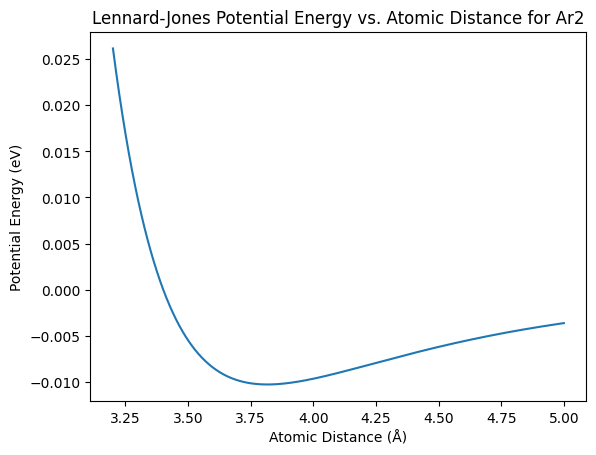

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Create a range of distances for argon atoms
argon_distances = np.linspace(3.2, 5.0, 1000)

# Calculate energies for each distance using Lennard-Jones potential
argon_energies = []
for d in argon_distances:
    argon = Atoms('Ar2', positions=[[0, 0, 0], [0, 0, d]])
    argon.calc = lj_calculator
    argon_energies.append(argon.get_potential_energy())

# Plot the results
plt.plot(argon_distances, argon_energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Lennard-Jones Potential Energy vs. Atomic Distance for Ar2')
plt.show()

### Morse Potential
In this example, we will use the Morse potential to simulate the interaction between hydrogen atoms.

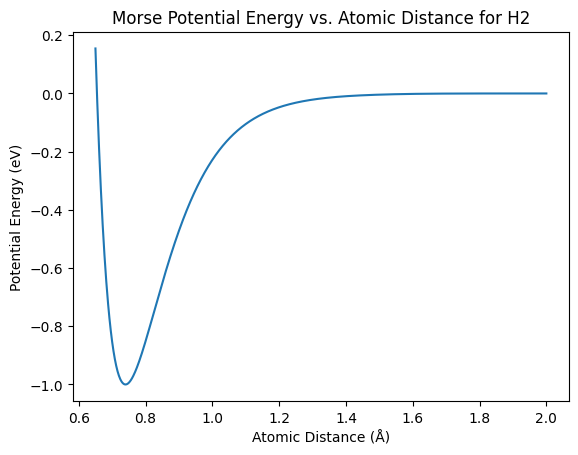

In [13]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt

# Create a range of distances
distances = np.linspace(0.65, 2, 1000)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

# Plot the results
plt.plot(distances, energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Morse Potential Energy vs. Atomic Distance for H2')
plt.show()


### EMT Potential
In this example, we will use the EMT potential to compute the equation of state of copper.

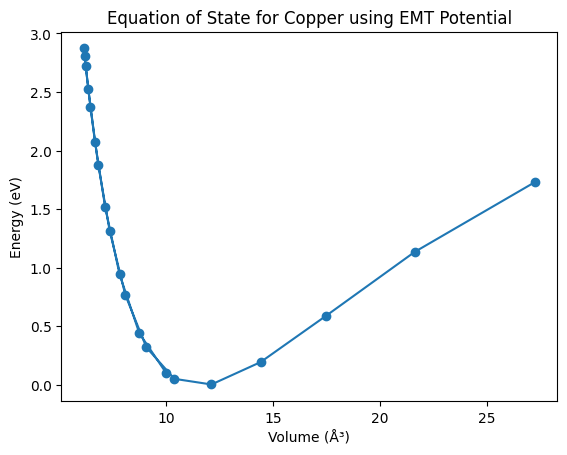

In [36]:
from ase.calculators.emt import EMT
from ase.build import bulk
from ase.units import kJ

# Create a bulk copper structure
cu = bulk('Cu', 'fcc', a=3.6)

# Initialize EMT calculator
cu.calc = EMT()

# Define a range of scaling factors for the unit cell
scaling_factors = np.linspace(0.95, 1.08, 20)

# Calculate energies for each scaling factor
volumes = []
energies = []
for factor in scaling_factors:
    cu.set_cell(cu.get_cell() * factor, scale_atoms=True)
    volumes.append(cu.get_volume())
    energies.append(cu.get_potential_energy())

# Plot the equation of state
plt.plot(volumes, energies, 'o-')
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Equation of State for Copper using EMT Potential')
plt.show()

## Conversion between ASE and pymatgen

ASE and pymatgen can be easily converted to each other. You can convert an `Atoms` object to a `Structure` object using the `ase_to_structure` function. You can also convert a `Structure` object to an `Atoms` object using the `structure_to_ase` function.

In this example, we will convert an `Atoms` object to a `Structure` object and vice versa.

In [23]:
from pymatgen.core import Structure, Lattice
from pymatgen.io.ase import AseAtomsAdaptor

# Create a silicon structure in pymatgen
lattice = Lattice.cubic(5.431)  # Silicon lattice constant in angstroms
structure = Structure(lattice, ["Si", "Si"], [[0, 0, 0], [0.25, 0.25, 0.25]])

# Convert pymatgen structure to ASE Atoms object
ase_atoms = AseAtomsAdaptor.get_atoms(structure)
print("ASE Atoms object:", ase_atoms)

ASE Atoms object: MSONAtoms(symbols='Si2', pbc=True, cell=[5.431, 5.431, 5.431])


In [24]:
# Convert ASE Atoms object to pymatgen Structure object
pmg_structure = AseAtomsAdaptor.get_structure(ase_atoms)
print("Pymatgen Structure object:", pmg_structure)

Pymatgen Structure object: Full Formula (Si2)
Reduced Formula: Si
abc   :   5.431000   5.431000   5.431000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25
